In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the AI-enhanced schedule for Sweets Makers
df = pd.read_csv("Scheduled_SweetsMakers_AI.csv")



In [7]:
# We'll create a melted dataframe that transforms the two assignment columns into one for easier plotting.
# Here, 'Assigned_Laddoos' represents the normal rule-based assignment,
# and 'Adjusted_Assigned_Laddoos' is the AI-powered adjusted assignment.
df_melted = df.melt(id_vars=["Employee_ID", "Predicted_Underperform"],
                    value_vars=["Assigned_Laddoos", "Adjusted_Assigned_Laddoos"],
                    var_name="Scheduling_Type",
                    value_name="Laddoos_Assignment")

# For clarity, rename the scheduling types
df_melted["Scheduling_Type"] = df_melted["Scheduling_Type"].map({
    "Assigned_Laddoos": "Normal Scheduling",
    "Adjusted_Assigned_Laddoos": "AI-Powered Scheduling"
})



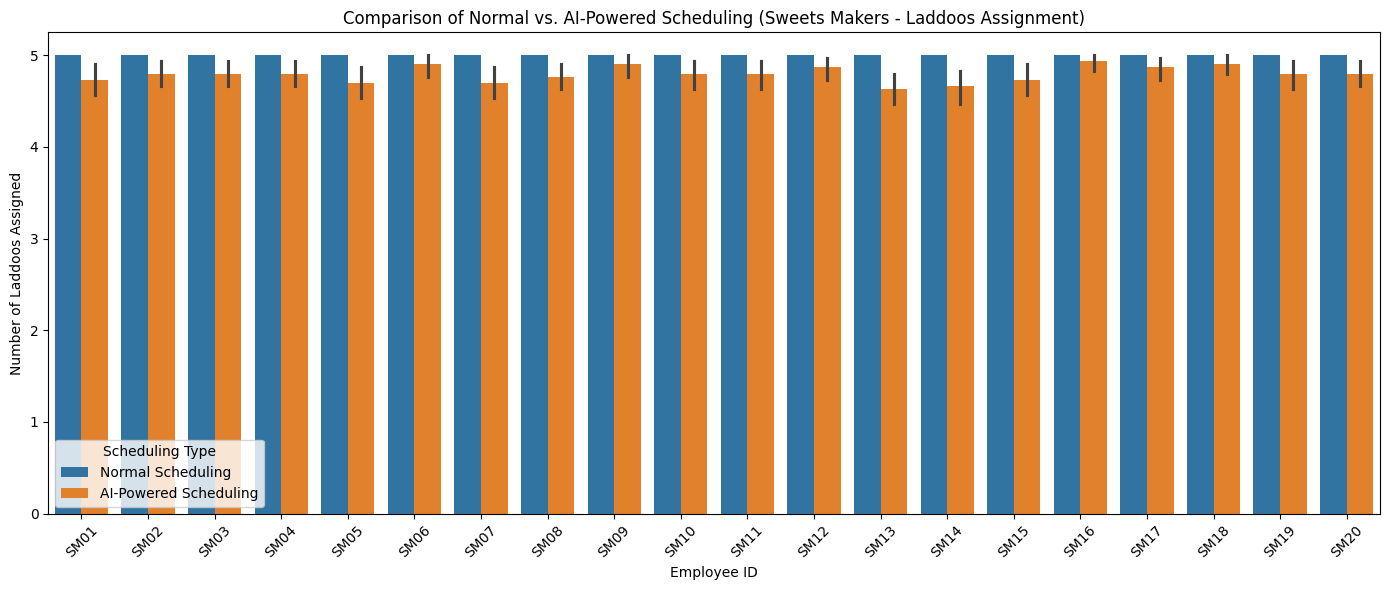

In [8]:
# Create a grouped bar chart to compare the two scheduling types for each employee
plt.figure(figsize=(14, 6))
sns.barplot(x="Employee_ID", y="Laddoos_Assignment", hue="Scheduling_Type", data=df_melted)
plt.title("Comparison of Normal vs. AI-Powered Scheduling (Sweets Makers - Laddoos Assignment)")
plt.xlabel("Employee ID")
plt.ylabel("Number of Laddoos Assigned")
plt.xticks(rotation=45)
plt.legend(title="Scheduling Type")
plt.tight_layout()
plt.show()


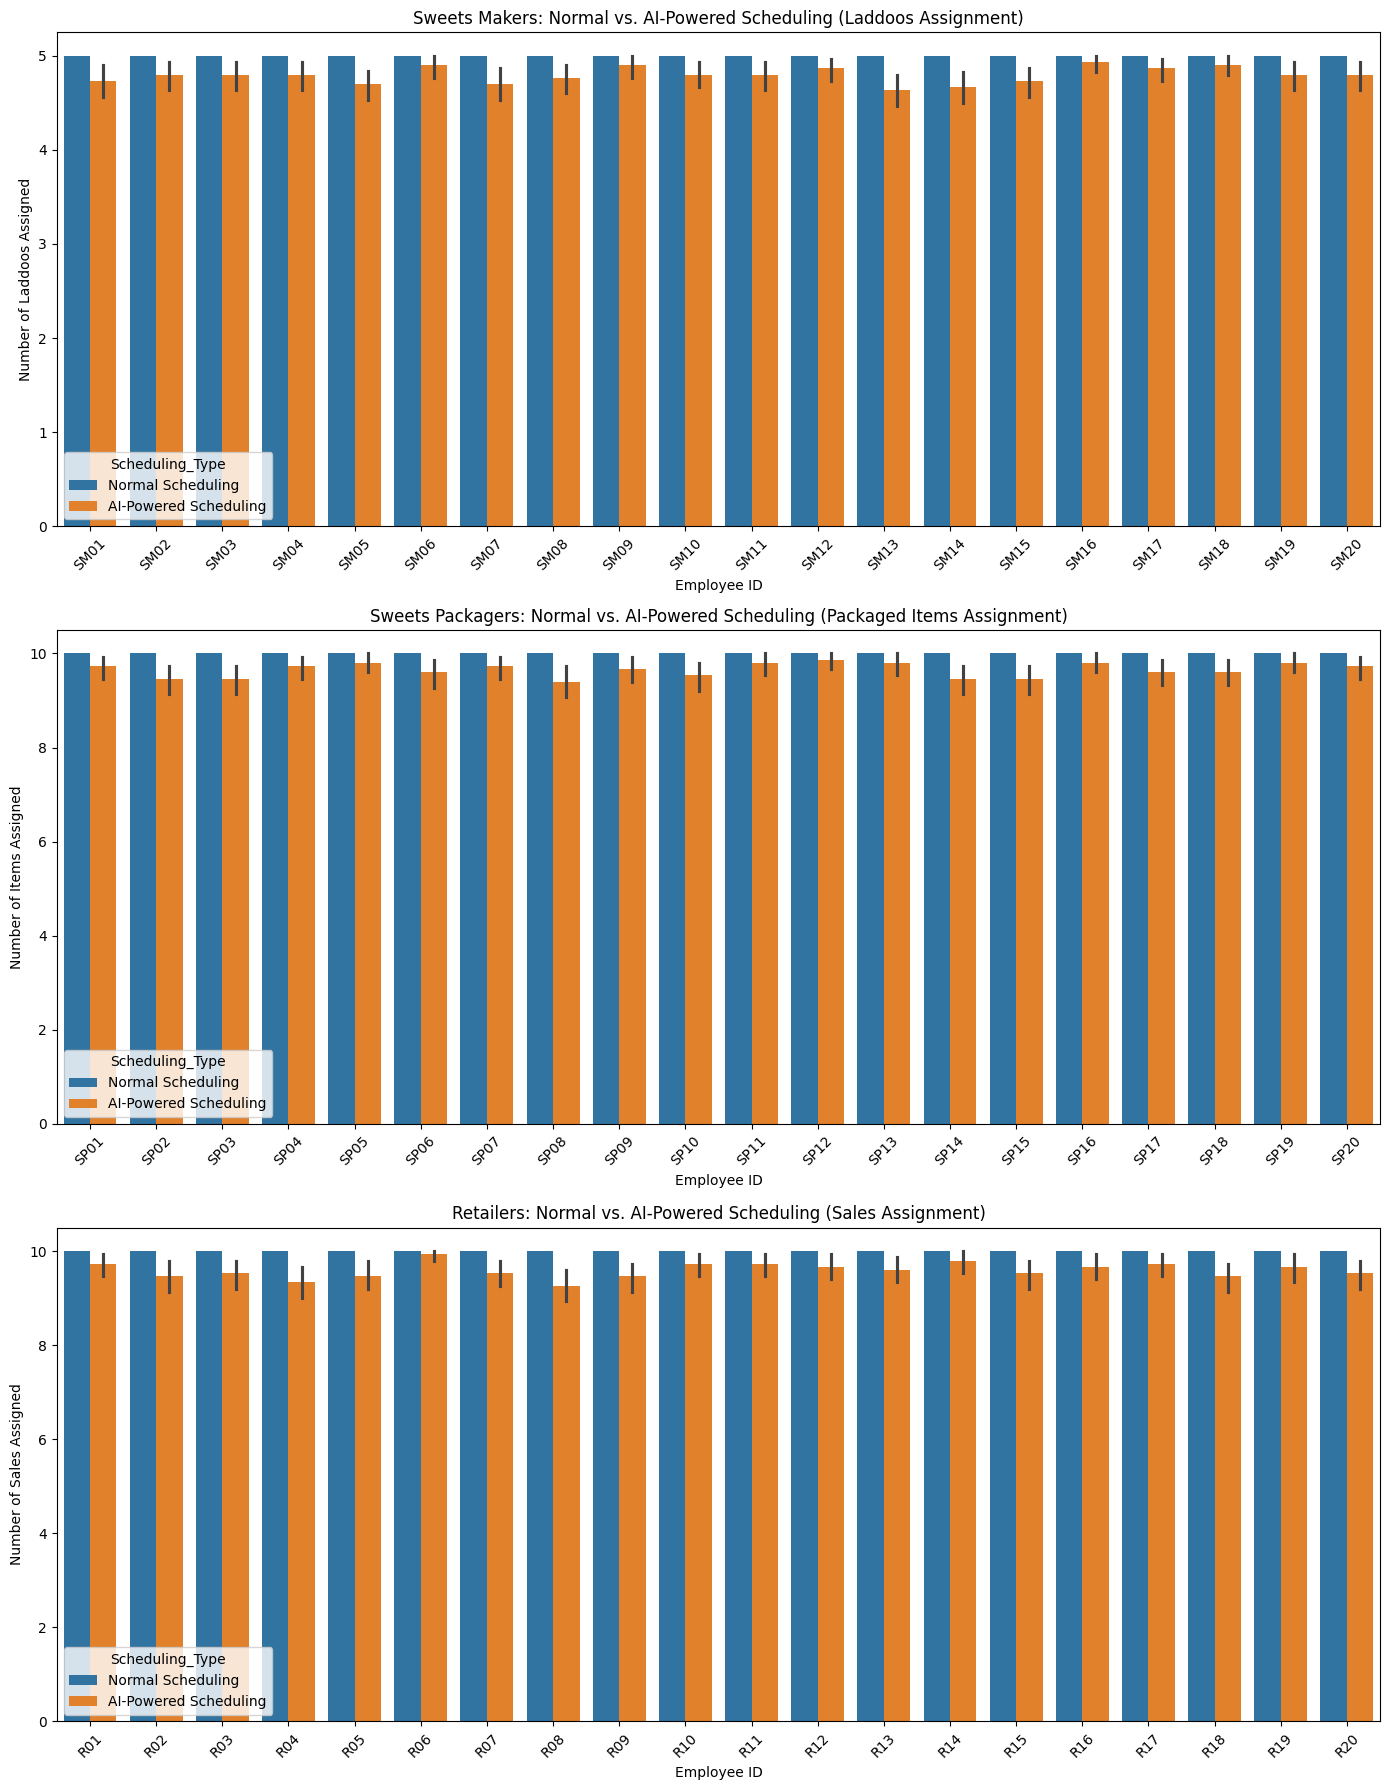

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the three AI-enhanced schedule CSV files
df_sm = pd.read_csv("Scheduled_SweetsMakers_AI.csv")
df_sp = pd.read_csv("Scheduled_SweetsPackagers_AI.csv")
df_r  = pd.read_csv("Scheduled_Retailers_AI.csv")

# Create subplots: one for each category
fig, axs = plt.subplots(3, 1, figsize=(14, 18))  # 3 rows, 1 column

# ---------------------
# Sweets Makers Visualization
# ---------------------
# Melt the data to have one column for scheduling type and one for assignment value
df_sm_melted = df_sm.melt(id_vars=["Employee_ID"],
                          value_vars=["Assigned_Laddoos", "Adjusted_Assigned_Laddoos"],
                          var_name="Scheduling_Type",
                          value_name="Laddoos_Assignment")
# Map the scheduling types to user-friendly names
df_sm_melted["Scheduling_Type"] = df_sm_melted["Scheduling_Type"].map({
    "Assigned_Laddoos": "Normal Scheduling",
    "Adjusted_Assigned_Laddoos": "AI-Powered Scheduling"
})

sns.barplot(data=df_sm_melted, x="Employee_ID", y="Laddoos_Assignment", hue="Scheduling_Type", ax=axs[0])
axs[0].set_title("Sweets Makers: Normal vs. AI-Powered Scheduling (Laddoos Assignment)")
axs[0].set_xlabel("Employee ID")
axs[0].set_ylabel("Number of Laddoos Assigned")
axs[0].tick_params(axis='x', rotation=45)

# ---------------------
# Sweets Packagers Visualization
# ---------------------
df_sp_melted = df_sp.melt(id_vars=["Employee_ID"],
                          value_vars=["Assigned_Packaged", "Adjusted_Assigned_Packaged"],
                          var_name="Scheduling_Type",
                          value_name="Packaged_Assignment")
df_sp_melted["Scheduling_Type"] = df_sp_melted["Scheduling_Type"].map({
    "Assigned_Packaged": "Normal Scheduling",
    "Adjusted_Assigned_Packaged": "AI-Powered Scheduling"
})

sns.barplot(data=df_sp_melted, x="Employee_ID", y="Packaged_Assignment", hue="Scheduling_Type", ax=axs[1])
axs[1].set_title("Sweets Packagers: Normal vs. AI-Powered Scheduling (Packaged Items Assignment)")
axs[1].set_xlabel("Employee ID")
axs[1].set_ylabel("Number of Items Assigned")
axs[1].tick_params(axis='x', rotation=45)

# ---------------------
# Retailers Visualization
# ---------------------
df_r_melted = df_r.melt(id_vars=["Employee_ID"],
                        value_vars=["Assigned_Sales", "Adjusted_Assigned_Sales"],
                        var_name="Scheduling_Type",
                        value_name="Sales_Assignment")
df_r_melted["Scheduling_Type"] = df_r_melted["Scheduling_Type"].map({
    "Assigned_Sales": "Normal Scheduling",
    "Adjusted_Assigned_Sales": "AI-Powered Scheduling"
})

sns.barplot(data=df_r_melted, x="Employee_ID", y="Sales_Assignment", hue="Scheduling_Type", ax=axs[2])
axs[2].set_title("Retailers: Normal vs. AI-Powered Scheduling (Sales Assignment)")
axs[2].set_xlabel("Employee ID")
axs[2].set_ylabel("Number of Sales Assigned")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


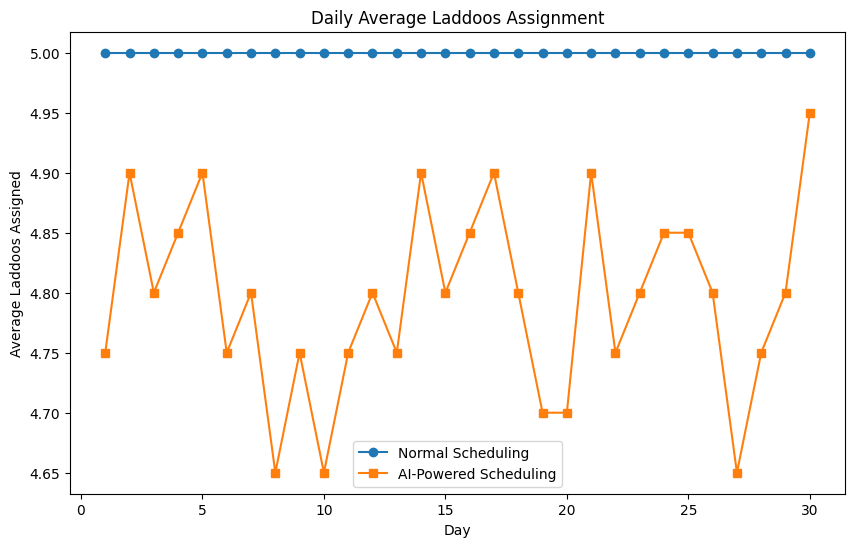

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Scheduled_SweetsMakers_AI.csv")

# Calculate daily average assignments for normal and AI-powered scheduling
daily_avg = df.groupby("Day").agg({
    "Assigned_Laddoos": "mean",
    "Adjusted_Assigned_Laddoos": "mean"
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_avg["Day"], daily_avg["Assigned_Laddoos"], marker="o", label="Normal Scheduling")
plt.plot(daily_avg["Day"], daily_avg["Adjusted_Assigned_Laddoos"], marker="s", label="AI-Powered Scheduling")
plt.title("Daily Average Laddoos Assignment")
plt.xlabel("Day")
plt.ylabel("Average Laddoos Assigned")
plt.legend()
plt.show()


Monthly Leaderboard for Sweets Makers:
   Employee_ID  Actual_Laddoos  Actual_Jalebis  Feedback_Rating  \
15        SM16             147             146         4.460000   
8         SM09             146             146         4.366667   
17        SM18             145             147         4.486667   
5         SM06             145             144         4.520000   
11        SM12             143             144         4.446667   
16        SM17             144             142         4.416667   
10        SM11             143             143         4.393333   
3         SM04             143             140         4.393333   
18        SM19             143             139         4.403333   
7         SM08             140             142         4.580000   
1         SM02             141             141         4.513333   
2         SM03             140             141         4.393333   
9         SM10             139             142         4.463333   
19        SM20         

C:\Users\Josh\AppData\Local\Temp\ipykernel_13088\3814189580.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Employee_ID", y="Total_Production", data=monthly_performance, palette="viridis")


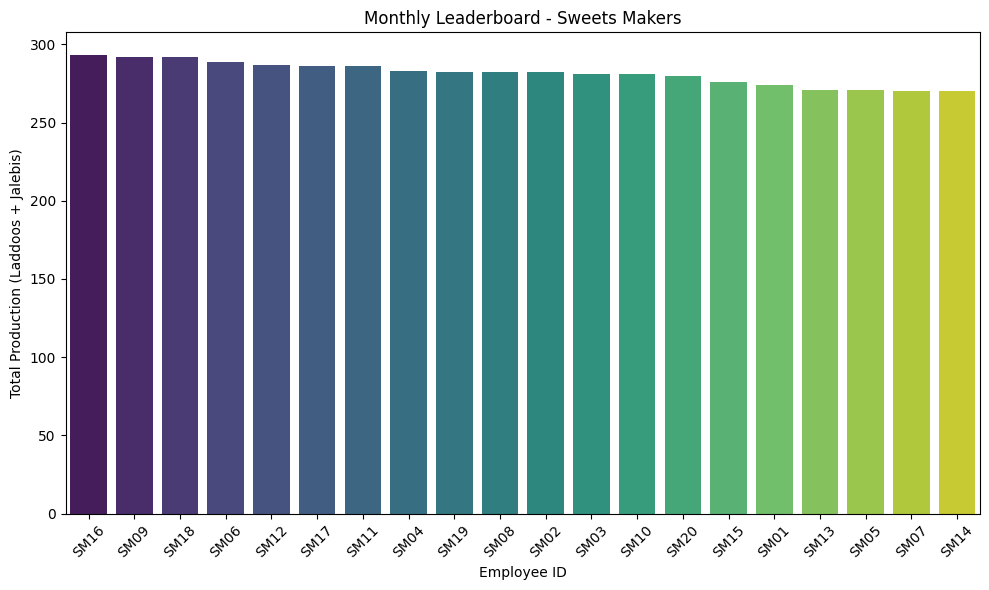

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the integrated Sweets Makers data
df_sm = pd.read_csv("Integrated_SweetsMakers.csv")

# Aggregate monthly performance: assuming 'Day' spans the month
monthly_performance = df_sm.groupby("Employee_ID").agg({
    "Actual_Laddoos": "sum",
    "Actual_Jalebis": "sum",
    "Feedback_Rating": "mean"
}).reset_index()

# Compute a total production metric (you can also add weights or include other factors)
monthly_performance["Total_Production"] = monthly_performance["Actual_Laddoos"] + monthly_performance["Actual_Jalebis"]

# Sort employees by total production
monthly_performance = monthly_performance.sort_values(by="Total_Production", ascending=False)

print("Monthly Leaderboard for Sweets Makers:")
print(monthly_performance)

# Visualize the leaderboard using a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Employee_ID", y="Total_Production", data=monthly_performance, palette="viridis")
plt.title("Monthly Leaderboard - Sweets Makers")
plt.xlabel("Employee ID")
plt.ylabel("Total Production (Laddoos + Jalebis)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


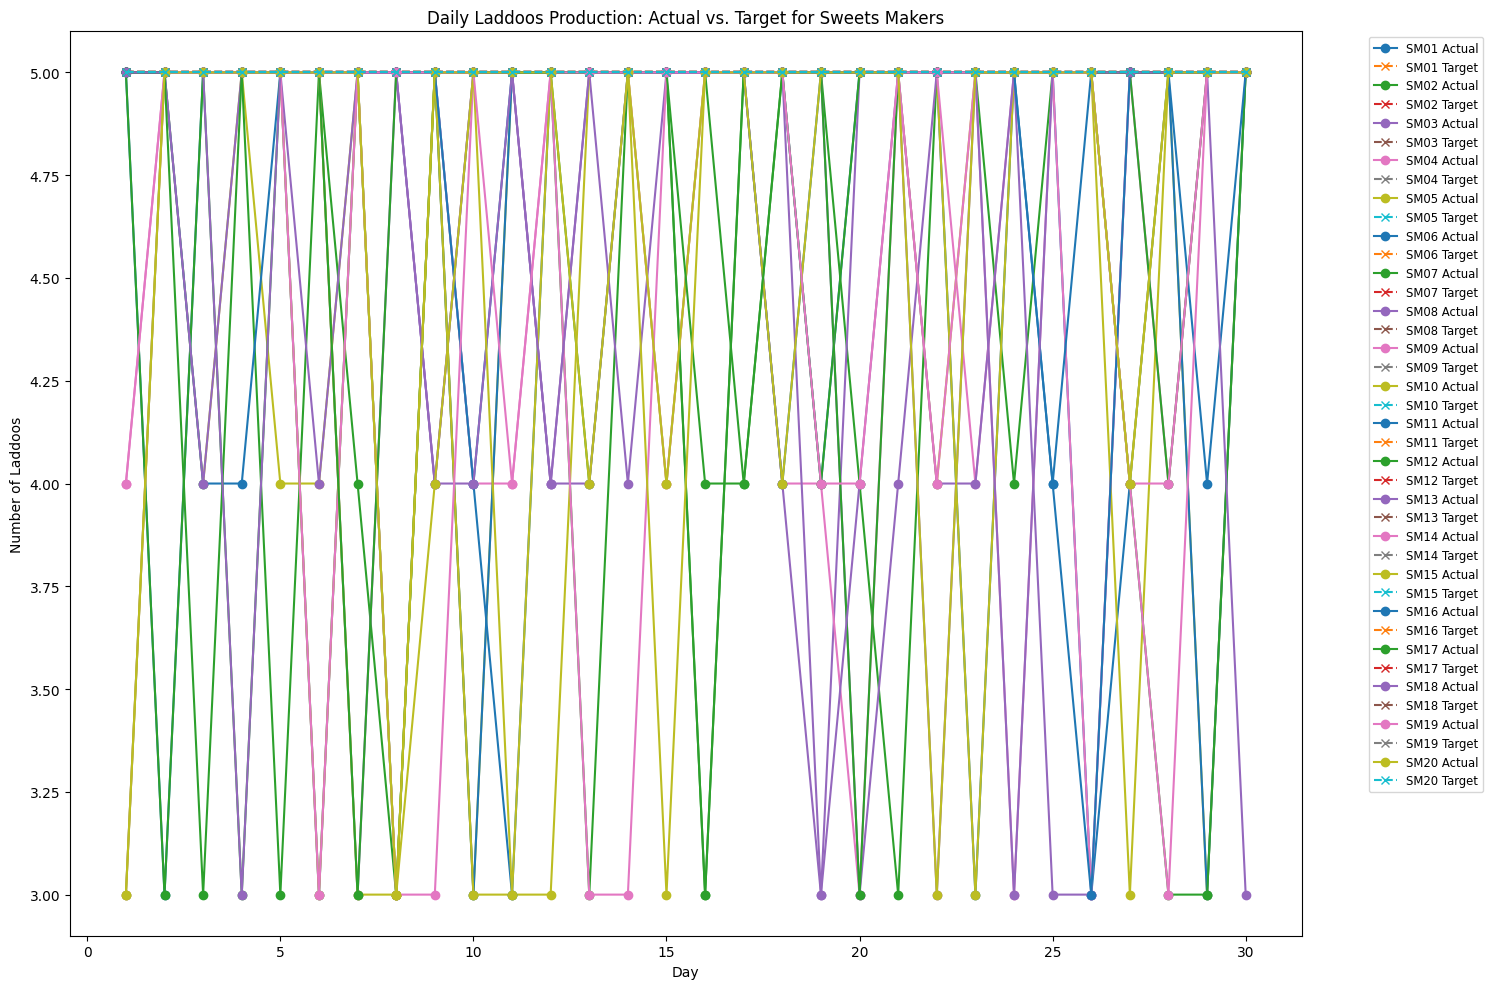

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the integrated Sweets Makers dataset
df = pd.read_csv("Integrated_SweetsMakers.csv")

# Let's assume your data has columns: 'Day', 'Employee_ID', 'Actual_Laddoos', 'Target_Laddoos', 'Feedback_Rating'
# We can create a line plot for each employee to track daily performance

employee_ids = df["Employee_ID"].unique()

plt.figure(figsize=(15, 10))
for emp in employee_ids:
    emp_data = df[df["Employee_ID"] == emp]
    plt.plot(emp_data["Day"], emp_data["Actual_Laddoos"], marker="o", label=f"{emp} Actual")
    plt.plot(emp_data["Day"], emp_data["Target_Laddoos"], marker="x", linestyle="--", label=f"{emp} Target")

plt.title("Daily Laddoos Production: Actual vs. Target for Sweets Makers")
plt.xlabel("Day")
plt.ylabel("Number of Laddoos")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
plt.tight_layout()
plt.show()
